In [64]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [65]:
gpus = tf.config.experimental.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [66]:
dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()
x_train, x_test = x_train[..., np.newaxis], x_test[..., np.newaxis]
print("shape of x_train: ", x_train.shape)
print("shape of y_train: ", y_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_test: ", y_test.shape)

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

shape of x_train:  (60000, 28, 28, 1)
shape of y_train:  (60000,)
shape of x_test:  (10000, 28, 28, 1)
shape of y_test:  (10000,)


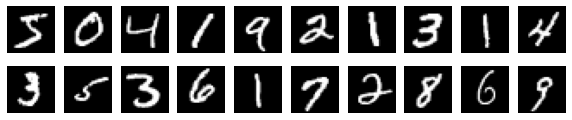

In [67]:
f, axes = plt.subplots(2, 10, figsize=(10, 2))
for i, ax in enumerate(axes.flat):
    ax.axis('off')
    ax.imshow(x_train[i], cmap="gray")
#plt.imshow(x_train[1]):

In [84]:
from tensorflow.keras.layers import Conv2D

class CNN(tf.keras.Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.c1 = Conv2D(filters=128, 
                         kernel_size=3,
                         activation='relu')
        self.c2 = Conv2D(filters=64,
                         kernel_size=3,
                         activation='relu')

    def call(self, inputs):
        x = self.c1(inputs)
        out = self.c2(x)
        return out

    def build_graph(self, input_shape):
        x = tf.keras.layers.Input(shape=input_shape)
        return tf.keras.Model(inputs=[x], outputs=self.call(x))

In [90]:
model = CNN()
graph = model.build_graph((28, 28, 1))
graph.summary()
# Parameters of the first layer: (3 x 3 + 1) x 128 = 1280
# Parameters of the second layer: (3 x 3 x 128 + 1) x 64 = 73792

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 conv2d_47 (Conv2D)          (None, 24, 24, 64)        73792     
                                                                 
Total params: 75,072
Trainable params: 75,072
Non-trainable params: 0
_________________________________________________________________
